In [1]:
import pandas as pd
import numpy as np

In [2]:
key_data = pd.read_csv('Key_Data.csv')

In [3]:
key_data.head(5)

,index_i,mentee_id,mentor_id,community,paper_num_mte,paper_num_mto,paper_ratio_mte,paper_ratio_mto,credit_mte,credit_mto,...,total_cits_mte,total_cits_mto,total_cits5_mte,total_cits5_mto,cits_mte,cits_mto,cits5_mte,cits5_mto,birthYear_mte,birthYear_mto
0,0,A1964335128,A177689540,5.0,0,26,0.000000,1.0,0.000000,96.139683,...,7237.0,21415.0,4403.0,5485.0,0.0,1996.0,0.0,673.0,2004,1956
1,0,A1964335128,A177689540,3.0,0,42,0.000000,1.0,0.000000,150.796825,...,7237.0,21415.0,4403.0,5485.0,0.0,1276.0,0.0,264.0,2004,1956
2,0,A1964335128,A177689540,6.0,25,0,1.000000,0.0,523.366667,0.000000,...,7237.0,21415.0,4403.0,5485.0,4163.0,0.0,2469.0,0.0,2004,1956
3,0,A1964335128,A177689540,1.0,0,62,0.000000,1.0,0.000000,175.473810,...,7237.0,21415.0,4403.0,5485.0,0.0,5142.0,0.0,806.0,2004,1956
4,0,A1964335128,A177689540,0.0,8,107,0.074766,1.0,132.846429,724.462374,...,7237.0,21415.0,4403.0,5485.0,1817.0,8735.0,795.0,2880.0,2004,1956


In [4]:
key_data.columns

Index(['index_i', 'mentee_id', 'mentor_id', 'community', 'paper_num_mte',
       'paper_num_mto', 'paper_ratio_mte', 'paper_ratio_mto', 'credit_mte',
       'credit_mto', 'communitys_paper_num_mto', 'communitys_paper_num_mte',
       'total_credit_mte', 'total_credit_mto', 'type', 'total_cits_mte',
       'total_cits_mto', 'total_cits5_mte', 'total_cits5_mto', 'cits_mte',
       'cits_mto', 'cits5_mte', 'cits5_mto', 'birthYear_mte', 'birthYear_mto'],
      dtype='object')

In [5]:
mentee_mentor_impact = key_data[['mentee_id','mentor_id','total_credit_mte','total_credit_mto','total_cits5_mte']].drop_duplicates().sort_values(by='total_credit_mte')#.values

In [6]:
q10,q25,q50,q75,q90 = mentee_mentor_impact['total_cits5_mte'].quantile([.1,.25,.5,.75,.90])

In [7]:
mentee_mentor_impact.shape

(49628, 5)

In [8]:
mentee_mentor_impact.sample(5)

,mentee_id,mentor_id,total_credit_mte,total_credit_mto,total_cits5_mte
156561,A2122109029,A1933066897,37.983333,2366.164286,519.0
3467,A2047669370,A1913387347,50.196429,112.112049,1053.0
136146,A2167792332,A2162897294,106.340079,4591.443786,1615.0
71907,A2122860508,A2093201198,121.117857,588.097680,2011.0
61138,A2582354219,A2041832096,45.241270,809.267796,788.0


##### surpasser

In [9]:
mentee_mentor = mentee_mentor_impact[['mentee_id','mentor_id']][mentee_mentor_impact.total_credit_mte>=mentee_mentor_impact.total_credit_mto].drop_duplicates().values

In [10]:
len(mentee_mentor)

8595

##### high-impact & surpasser

In [11]:
mentee_mentor = mentee_mentor_impact[['mentee_id','mentor_id']][(mentee_mentor_impact.total_credit_mte>=mentee_mentor_impact.total_credit_mto)&(mentee_mentor_impact.total_cits5_mte>=q75)].drop_duplicates().values

In [12]:
len(mentee_mentor)

4860

In [13]:
mentee_mentor

array([['A2104007745', 'A2046609805'],
       ['A2154929074', 'A2780323688'],
       ['A2118141586', 'A2145845926'],
       ...,
       ['A1863347785', 'A2008924823'],
       ['A1953941416', 'A1990762364'],
       ['A1953941416', 'A2164703361']], dtype=object)

Text(0.5, 1.0, 'the first publication year of elites')

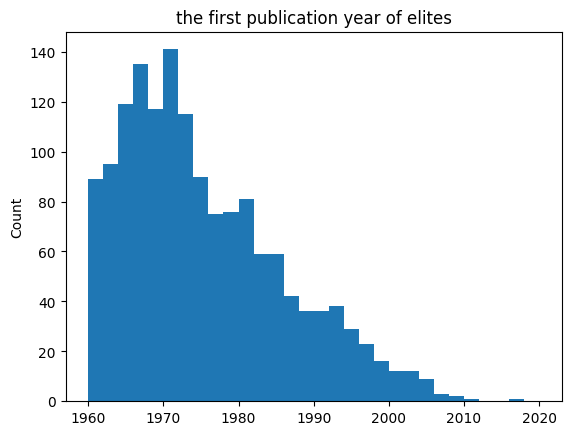

In [16]:
import matplotlib.pyplot as plt
t_test = key_data[['mentee_id','birthYear_mte']][key_data.mentee_id.isin(mentee_mentor[:,1])].drop_duplicates()
a = plt.hist(t_test.birthYear_mte,bins=30,range=[1960,2020])
plt.ylabel('Count')
plt.title('the first publication year of elites')

In [13]:
# all_main_cits5_mte.to_csv('elites_main_credit_mte.csv',index=0)
# all_asso_cits5_mte.to_csv('elites_asso_credit_mte.csv',index=0)
# all_new_cits5_mte.to_csv('elites_new_credit_mte.csv',index=0)

In [14]:
# all_main_cits5_mte = Main_credit
# all_asso_cits5_mte = Asso_credit
# all_new_cits5_mte = New_credit

all_main_cits5 = pd.read_csv('elites_main_credit_mte.csv')
all_asso_cits5 = pd.read_csv('elites_asso_credit_mte.csv')
all_new_cits5 = pd.read_csv('elites_new_credit_mte.csv')

In [15]:
all_main_cits5.head(5)

,mentee_id,weight_frac_credit,career_age,type
0,A2055177396,3.285714,0,main
1,A2055177396,3.250000,0,main
2,A2055177396,2.000000,1,main
3,A2055177396,0.142857,2,main
4,A2055177396,0.333333,2,main


In [16]:
len(all_main_cits5)

110455

In [17]:
len(all_asso_cits5)

532855

In [18]:
len(all_new_cits5)

646597

In [19]:
print(np.mean(all_main_cits5.weight_frac_credit))
print(np.mean(all_asso_cits5.weight_frac_credit))
print(np.mean(all_new_cits5.weight_frac_credit))

5.300204913761735
6.939748888270694
5.32653585974012


#### cumu. firstly, then average

In [20]:
def cumsum_cits5(tp_df):
    ave_cits5 = tp_df.groupby('career_age')['weight_frac_credit'].agg('sum').reset_index(name='weight_frac_credit')
    cumsum_cits5 = ave_cits5.cumsum()['weight_frac_credit']
    try:
        ave_cits5['cumu. credit'] = cumsum_cits5
    except:
        ave_cits5 = 'error'
    
    ave_cits5 = ave_cits5.values
    
    return ave_cits5

In [21]:
temp_main_mte = all_main_cits5.groupby('mentee_id').apply(cumsum_cits5).reset_index(name='weight_frac_credit')

cumu_cits5_info_mte = pd.DataFrame([],columns=['career_age','weight_frac_credit','cumu_credit','mentee_id'])
for k in temp_main_mte.values:
    mentee_id = k[0]
    mentee_cits_info = k[1]
    
    
    mentee_cits_info = pd.DataFrame(mentee_cits_info,columns=['career_age','weight_frac_credit','cumu_credit'])
    career_len = int(max(mentee_cits_info.career_age))
    # print(career_len)
    age_list = list(range(career_len))
    zero_cits5 = np.array(list(set(age_list) - set(mentee_cits_info.career_age)))
    zero_cits5_ = zero_cits5 - 1
    temp = mentee_cits_info[mentee_cits_info.career_age.isin(zero_cits5_)]
    temp.loc[:,'career_age'] = np.array(temp['career_age']) + 1
    temp.loc[:,'weight_frac_credit'] = 0
    mentee_cits_info = pd.concat((mentee_cits_info,temp)).sort_values(by='career_age')
    
    mentee_cits_info.loc[:,'mentee_id'] = mentee_id
    
    cumu_cits5_info_mte = pd.concat((cumu_cits5_info_mte,mentee_cits_info))
mte_evolution = cumu_cits5_info_mte.groupby('career_age')[['weight_frac_credit','cumu_credit']].agg('mean').reset_index()
mte_main_evolution = mte_evolution[mte_evolution.career_age<100]

In [22]:
temp_asso_mte = all_asso_cits5.groupby('mentee_id').apply(cumsum_cits5).reset_index(name='weight_frac_credit')

cumu_cits5_info_mte = pd.DataFrame([],columns=['career_age','weight_frac_credit','cumu_credit','mentee_id'])
for k in temp_asso_mte.values:
    mentee_id = k[0]
    mentee_cits_info = k[1]
    
    
    mentee_cits_info = pd.DataFrame(mentee_cits_info,columns=['career_age','weight_frac_credit','cumu_credit'])
    career_len = int(max(mentee_cits_info.career_age))
    # print(career_len)
    age_list = list(range(career_len))
    zero_cits5 = np.array(list(set(age_list) - set(mentee_cits_info.career_age)))
    zero_cits5_ = zero_cits5 - 1
    temp = mentee_cits_info[mentee_cits_info.career_age.isin(zero_cits5_)]
    temp.loc[:,'career_age'] = np.array(temp['career_age']) + 1
    temp.loc[:,'weight_frac_credit'] = 0
    mentee_cits_info = pd.concat((mentee_cits_info,temp)).sort_values(by='career_age')
    
    mentee_cits_info.loc[:,'mentee_id'] = mentee_id
    
    cumu_cits5_info_mte = pd.concat((cumu_cits5_info_mte,mentee_cits_info))

mte_evolution = cumu_cits5_info_mte.groupby('career_age')[['weight_frac_credit','cumu_credit']].agg('mean').reset_index()
mte_asso_evolution = mte_evolution[mte_evolution.career_age<100]

In [23]:
temp_new_mte = all_new_cits5.groupby('mentee_id').apply(cumsum_cits5).reset_index(name='weight_frac_credit')

cumu_cits5_info_mte = pd.DataFrame([],columns=['career_age','weight_frac_credit','cumu_credit','mentee_id'])
for k in temp_new_mte.values:
    mentee_id = k[0]
    mentee_cits_info = k[1]
    
    
    mentee_cits_info = pd.DataFrame(mentee_cits_info,columns=['career_age','weight_frac_credit','cumu_credit'])
    career_len = int(max(mentee_cits_info.career_age))
    # print(career_len)
    age_list = list(range(career_len))
    zero_cits5 = np.array(list(set(age_list) - set(mentee_cits_info.career_age)))
    zero_cits5_ = zero_cits5 - 1
    temp = mentee_cits_info[mentee_cits_info.career_age.isin(zero_cits5_)]
    temp.loc[:,'career_age'] = np.array(temp['career_age']) + 1
    temp.loc[:,'weight_frac_credit'] = 0
    mentee_cits_info = pd.concat((mentee_cits_info,temp)).sort_values(by='career_age')
    
    mentee_cits_info.loc[:,'mentee_id'] = mentee_id
    
    cumu_cits5_info_mte = pd.concat((cumu_cits5_info_mte,mentee_cits_info))

mte_evolution = cumu_cits5_info_mte.groupby('career_age')[['weight_frac_credit','cumu_credit']].agg('mean').reset_index()
mte_new_evolution = mte_evolution[mte_evolution.career_age<100]

In [24]:
cumu_cits5_info_mte.head(5)

,career_age,weight_frac_credit,cumu_credit,mentee_id
0,8.0,14.916667,14.916667,A100328954
0,9.0,0.000000,14.916667,A100328954
1,12.0,4.000000,18.916667,A100328954
2,13.0,8.400000,27.316667,A100328954
3,14.0,1520.000000,1547.316667,A100328954


### Done

### Mentor Credit

In [25]:
# all_main_cits5 =  Main_credit
# all_asso_cits5 = Asso_credit
# all_new_cits5 = New_credit

all_main_cits5 = pd.read_csv('elites_main_credit_mto.csv')
all_asso_cits5 = pd.read_csv('elites_asso_credit_mto.csv')
all_new_cits5 = pd.read_csv('elites_new_credit_mto.csv')

In [26]:
print(len(all_main_cits5))
print(len(all_asso_cits5))
print(len(all_new_cits5))

444694
141088
0


In [27]:
print(np.mean(all_main_cits5.weight_frac_credit))
print(np.mean(all_asso_cits5.weight_frac_credit))
print(np.mean(all_new_cits5.weight_frac_credit))

4.308845626153479
3.6145752685717594
nan


In [28]:
def cumsum_cits5(tp_df):
    ave_cits5 = tp_df.groupby('career_age')['weight_frac_credit'].agg('sum').reset_index(name='weight_frac_credit')
    cumsum_cits5 = ave_cits5.cumsum()['weight_frac_credit']
    try:
        ave_cits5['cumu. credit'] = cumsum_cits5
    except:
        ave_cits5 = 'error'
    
    ave_cits5 = ave_cits5.values
    
    return ave_cits5

##### main topic

In [29]:
temp_main_mto = all_main_cits5.groupby('mentor_id').apply(cumsum_cits5).reset_index(name='weight_frac_credit')

cumu_cits5_info_mto = pd.DataFrame([],columns=['career_age','weight_frac_credit','cumu_credit','mentor_id'])
for k in temp_main_mto.values:
    mentor_id = k[0]
    mentee_cits_info = k[1]
    
    
    mentee_cits_info = pd.DataFrame(mentee_cits_info,columns=['career_age','weight_frac_credit','cumu_credit'])
    career_len = int(max(mentee_cits_info.career_age))
    # print(career_len)
    age_list = list(range(career_len))
    zero_cits5 = np.array(list(set(age_list) - set(mentee_cits_info.career_age)))
    zero_cits5_ = zero_cits5 - 1
    temp = mentee_cits_info[mentee_cits_info.career_age.isin(zero_cits5_)]
    temp.loc[:,'career_age'] = np.array(temp['career_age']) + 1
    temp.loc[:,'weight_frac_credit'] = 0
    mentee_cits_info = pd.concat((mentee_cits_info,temp)).sort_values(by='career_age')
    
    mentee_cits_info.loc[:,'mentor_id'] = mentor_id
    
    cumu_cits5_info_mto = pd.concat((cumu_cits5_info_mto,mentee_cits_info))
    
mto_evolution = cumu_cits5_info_mto.groupby('career_age')[['weight_frac_credit','cumu_credit']].agg('mean').reset_index()
mto_main_evolution = mto_evolution[mto_evolution.career_age<100]

##### asso topic

In [30]:
temp_asso_mto = all_asso_cits5.groupby('mentor_id').apply(cumsum_cits5).reset_index(name='weight_frac_credit') #adjust

cumu_cits5_info_mto = pd.DataFrame([],columns=['career_age','weight_frac_credit','cumu_credit','mentor_id'])
for k in temp_asso_mto.values:     #adjust
    mentor_id = k[0]
    mentee_cits_info = k[1]
    
    
    mentee_cits_info = pd.DataFrame(mentee_cits_info,columns=['career_age','weight_frac_credit','cumu_credit'])
    career_len = int(max(mentee_cits_info.career_age))
    # print(career_len)
    age_list = list(range(career_len))
    zero_cits5 = np.array(list(set(age_list) - set(mentee_cits_info.career_age)))
    zero_cits5_ = zero_cits5 - 1
    temp = mentee_cits_info[mentee_cits_info.career_age.isin(zero_cits5_)]
    temp.loc[:,'career_age'] = np.array(temp['career_age']) + 1
    temp.loc[:,'weight_frac_credit'] = 0
    mentee_cits_info = pd.concat((mentee_cits_info,temp)).sort_values(by='career_age')
    
    mentee_cits_info.loc[:,'mentor_id'] = mentor_id
    
    cumu_cits5_info_mto = pd.concat((cumu_cits5_info_mto,mentee_cits_info))
    
mto_evolution = cumu_cits5_info_mto.groupby('career_age')[['weight_frac_credit','cumu_credit']].agg('mean').reset_index()
mto_asso_evolution = mto_evolution[mto_evolution.career_age<100] #adjust

### Plot

In [31]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  #画密度图
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable #python颜色库

In [32]:
type_colors = {'all':'k','main':'#fc8d62','asso':'#66c2a5','new':'grey'}

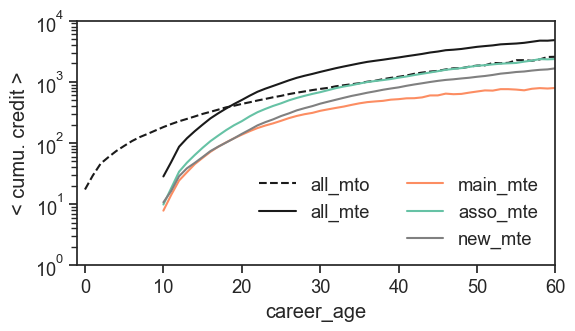

In [33]:
sns.set(style='ticks', font_scale=1.2, font='Arial')
fig, ax = plt.subplots(figsize=(4.7*1.2,3.2), constrained_layout=True)

# Mentor
#average cumulative
# ax.plot(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,label='main',marker='o',color='#fc8d62')
# ax.plot(mto_asso_evolution.career_age,mto_asso_evolution.cumu_credit,label='asso',marker='o',color='#66c2a5')

sum_cumu_credit = mto_main_evolution.cumu_credit + mto_asso_evolution.cumu_credit
ax.plot(mto_main_evolution.career_age ,sum_cumu_credit,label='all_mto',marker='',color='k',mec='k',mfc='white',ls='--')

# ax.semilogy(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,label='main_mto',marker='',color='#fc8d62',ls='--',
#             mec='#fc8d62',mfc='white')
# ax.semilogy(mto_asso_evolution.career_age,mto_asso_evolution.cumu_credit,label='asso_mto',marker='',color='#66c2a5',ls='--',
#             mec='#66c2a5',mfc='white')

ax.set(xlabel='career_age',ylabel='< cumu. credit >',
      xlim=[-1,60],ylim=[1,10000])




# Mentee

# average
# ax.plot(mte_main_evolution.career_age,mte_main_evolution.cits5,label='main',marker='o',color='#fc8d62')
# ax.plot(mte_asso_evolution.career_age,mte_asso_evolution.cits5,label='asso',marker='o',color='#66c2a5')
# ax.plot(mte_new_evolution.career_age ,mte_new_evolution.cits5,label='new',marker='o',color='grey')

# ax.set(xlabel='career_age',ylabel='< cits5 >',
#       xlim=[0,60],ylim=[0,500])


# #average cumulative
sum_cumu_credit = mte_new_evolution.cumu_credit + mte_main_evolution.cumu_credit + mte_asso_evolution.cumu_credit
ax.plot(mte_new_evolution.career_age+10 ,sum_cumu_credit,label='all_mte',marker='',color='k',mec='k',mfc='white')

# only for adjusting legend
ax.semilogy(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,marker='',color='white',ls='--',label=' ',alpha=0,
            mec='#fc8d62',mfc='white')
#adjustment done

ax.plot(mte_main_evolution.career_age+10,mte_main_evolution.cumu_credit,label='main_mte',marker='',color='#fc8d62',mec='#fc8d62',mfc='white')
ax.plot(mte_asso_evolution.career_age+10,mte_asso_evolution.cumu_credit,label='asso_mte',marker='',color='#66c2a5',mec='#66c2a5',mfc='white')
ax.plot(mte_new_evolution.career_age+10 ,mte_new_evolution.cumu_credit,label='new_mte',marker='',color='grey',mec='grey',mfc='white')



# ax.semilogy(mte_main_evolution.career_age,mte_main_evolution.cumu_credit,label='main',marker='o',color='#fc8d62')
# ax.semilogy(mte_asso_evolution.career_age,mte_asso_evolution.cumu_credit,label='asso',marker='o',color='#66c2a5')
# ax.semilogy(mte_new_evolution.career_age ,mte_new_evolution.cumu_credit,label='new',marker='o',color='grey')

# ax.set(xlabel='career_age',ylabel='< cumu. credit >',
#       xlim=[-1,60],ylim=[0,1500])

x_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)


plt.legend(frameon=0,ncol=2)
plt.show()
# fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Physics/who_is_surpasser/result_data_plot/average cumu credit(10_surpasser&high-impact).pdf')

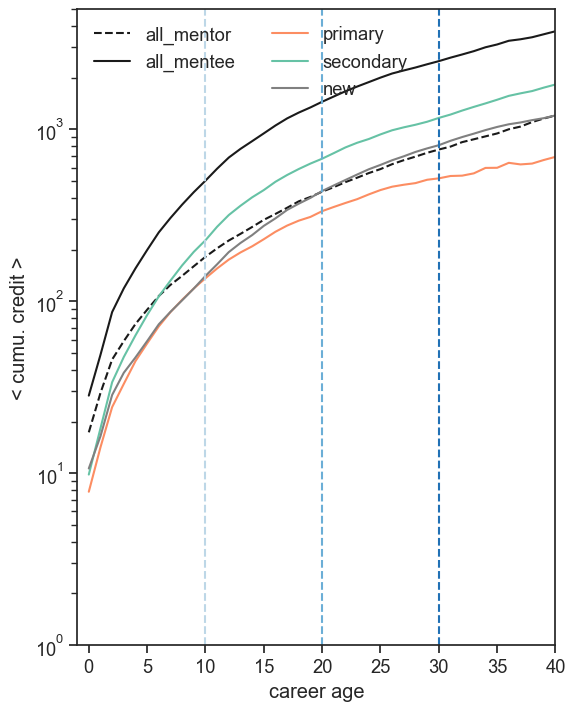

In [34]:
sns.set(style='ticks', font_scale=1.2, font='Arial')
fig, ax = plt.subplots(figsize=(4.7*1.2,7), constrained_layout=True)

# Mentor
#average cumulative
# ax.plot(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,label='main',marker='o',color='#fc8d62')
# ax.plot(mto_asso_evolution.career_age,mto_asso_evolution.cumu_credit,label='asso',marker='o',color='#66c2a5')

sum_cumu_credit = mto_main_evolution.cumu_credit + mto_asso_evolution.cumu_credit
ax.plot(mto_main_evolution.career_age ,sum_cumu_credit,label='all_mentor',marker='',color='k',mec='k',mfc='white',ls='--')
# ax.semilogy(mto_main_evolution.career_age ,sum_cumu_credit,label='all_mentor',marker='',color='k',mec='k',mfc='white',ls='--')


ax.set(xlabel='career age',ylabel='< cumu. credit >',
      xlim=[-1,40],ylim=[1,5000])




# Mentee


# #average cumulative
sum_cumu_credit = mte_new_evolution.cumu_credit + mte_main_evolution.cumu_credit + mte_asso_evolution.cumu_credit
ax.plot(mte_new_evolution.career_age ,sum_cumu_credit,label='all_mentee',marker='',color='k',mec='k',mfc='white')

# only for adjusting legend
# ax.semilogy(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,marker='',color='white',ls='--',label=' ',alpha=0,
#             mec='#fc8d62',mfc='white')
ax.plot(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,marker='',color='white',ls='--',label=' ',alpha=0,
            mec='#fc8d62',mfc='white')

#adjustment done

ax.plot(mte_main_evolution.career_age,mte_main_evolution.cumu_credit,label='primary',marker='',color='#fc8d62',mec='#fc8d62',mfc='white')
ax.plot(mte_asso_evolution.career_age,mte_asso_evolution.cumu_credit,label='secondary',marker='',color='#66c2a5',mec='#66c2a5',mfc='white')
ax.plot(mte_new_evolution.career_age,mte_new_evolution.cumu_credit,label='new',marker='',color='grey',mec='grey',mfc='white')

ax.axvline(x=10,ls='--',color='#bdd7e7')
ax.axvline(x=20,ls='--',color='#6baed6')
ax.axvline(x=30,ls='--',color='#2171b5')


# ax.semilogy(mte_main_evolution.career_age,mte_main_evolution.cumu_credit,label='main',marker='o',color='#fc8d62')
# ax.semilogy(mte_asso_evolution.career_age,mte_asso_evolution.cumu_credit,label='asso',marker='o',color='#66c2a5')
# ax.semilogy(mte_new_evolution.career_age ,mte_new_evolution.cumu_credit,label='new',marker='o',color='grey')

# ax.set(xlabel='career_age',ylabel='< cumu. credit >',
#       xlim=[-1,60],ylim=[0,1500])

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.legend(frameon=0,ncols=2,loc='upper left')
plt.yscale('log',base=10)
plt.show()
# fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Chemistry/result_data_plot/new_plot(202403)/average cumu credit(high-impact surpasser).pdf')

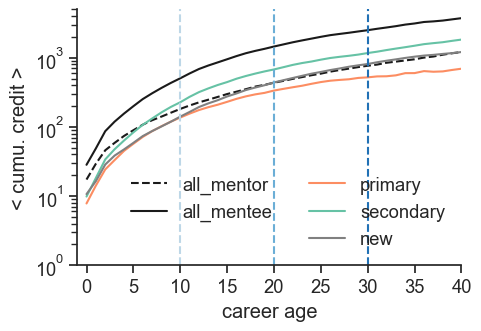

In [39]:
sns.set(style='ticks', font_scale=1.2, font='Arial')
fig, ax = plt.subplots(figsize=(4.7*1.0,3.2), constrained_layout=True)

# Mentor
#average cumulative
# ax.plot(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,label='main',marker='o',color='#fc8d62')
# ax.plot(mto_asso_evolution.career_age,mto_asso_evolution.cumu_credit,label='asso',marker='o',color='#66c2a5')

sum_cumu_credit = mto_main_evolution.cumu_credit + mto_asso_evolution.cumu_credit
ax.plot(mto_main_evolution.career_age ,sum_cumu_credit,label='all_mentor',marker='',color='k',mec='k',mfc='white',ls='--')
# ax.semilogy(mto_main_evolution.career_age ,sum_cumu_credit,label='all_mentor',marker='',color='k',mec='k',mfc='white',ls='--')


ax.set(xlabel='career age',ylabel='< cumu. credit >',
      xlim=[-1,40],ylim=[1,5000])




# Mentee


# #average cumulative
sum_cumu_credit = mte_new_evolution.cumu_credit + mte_main_evolution.cumu_credit + mte_asso_evolution.cumu_credit
ax.plot(mte_new_evolution.career_age ,sum_cumu_credit,label='all_mentee',marker='',color='k',mec='k',mfc='white')

# only for adjusting legend
# ax.semilogy(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,marker='',color='white',ls='--',label=' ',alpha=0,
#             mec='#fc8d62',mfc='white')
ax.plot(mto_main_evolution.career_age,mto_main_evolution.cumu_credit,marker='',color='white',ls='--',label=' ',alpha=0,
            mec='#fc8d62',mfc='white')

#adjustment done

ax.plot(mte_main_evolution.career_age,mte_main_evolution.cumu_credit,label='primary',marker='',color='#fc8d62',mec='#fc8d62',mfc='white')
ax.plot(mte_asso_evolution.career_age,mte_asso_evolution.cumu_credit,label='secondary',marker='',color='#66c2a5',mec='#66c2a5',mfc='white')
ax.plot(mte_new_evolution.career_age,mte_new_evolution.cumu_credit,label='new',marker='',color='grey',mec='grey',mfc='white')

ax.axvline(x=10,ls='--',color='#bdd7e7')
ax.axvline(x=20,ls='--',color='#6baed6')
ax.axvline(x=30,ls='--',color='#2171b5')


# ax.semilogy(mte_main_evolution.career_age,mte_main_evolution.cumu_credit,label='main',marker='o',color='#fc8d62')
# ax.semilogy(mte_asso_evolution.career_age,mte_asso_evolution.cumu_credit,label='asso',marker='o',color='#66c2a5')
# ax.semilogy(mte_new_evolution.career_age ,mte_new_evolution.cumu_credit,label='new',marker='o',color='grey')

# ax.set(xlabel='career_age',ylabel='< cumu. credit >',
#       xlim=[-1,60],ylim=[0,1500])

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.legend(frameon=0,ncols=2,loc='lower right')
plt.yscale('log',base=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Chemistry/result_data_plot/new_plot(202403)/average cumu credit(high-impact surpasser).pdf')

#### pub. type distribution in different career stage

In [35]:
# all_main_cits5 = all_main_cits5_mte
# all_asso_cits5 = all_asso_cits5_mte
# all_new_cits5 = all_new_cits5_mte


all_main_cits5 = pd.read_csv('elites_main_credit_mte.csv')
all_asso_cits5 = pd.read_csv('elites_asso_credit_mte.csv')
all_new_cits5 = pd.read_csv('elites_new_credit_mte.csv')

In [36]:
all_main_cits5.head(5)

,mentee_id,weight_frac_credit,career_age,type
0,A2055177396,3.285714,0,main
1,A2055177396,3.250000,0,main
2,A2055177396,2.000000,1,main
3,A2055177396,0.142857,2,main
4,A2055177396,0.333333,2,main


In [37]:
all_paper_mte = pd.DataFrame([],columns=['mentee_id','weight_frac_credit','career_age','type'])
all_paper_mte = pd.concat((all_paper_mte,all_main_cits5))
all_paper_mte = pd.concat((all_paper_mte,all_asso_cits5))
all_paper_mte = pd.concat((all_paper_mte,all_new_cits5))

In [38]:
all_paper_mte.shape

(1289907, 4)

In [39]:
all_paper_mte.head(5)

,mentee_id,weight_frac_credit,career_age,type
0,A2055177396,3.285714,0,main
1,A2055177396,3.250000,0,main
2,A2055177396,2.000000,1,main
3,A2055177396,0.142857,2,main
4,A2055177396,0.333333,2,main


In [40]:
def career_type(tp_df):
    c0 = 0
    c1 = 20
    c2 = 30
    c_special = 10
    
    c_special_all = tp_df[(tp_df.career_age>=c0)&(tp_df.career_age<c_special)]
    c_special_main = tp_df[(tp_df.career_age>=c0)&(tp_df.career_age<c_special)&(tp_df.type=='main')]
    c_special_asso = tp_df[(tp_df.career_age>=c0)&(tp_df.career_age<c_special)&(tp_df.type=='asso')]
    c_special_new = tp_df[(tp_df.career_age>=c0)&(tp_df.career_age<c_special)&(tp_df.type=='new')]
    
    c0_all = tp_df[(tp_df.career_age>=c_special)&(tp_df.career_age<c1)]
    c0_main = tp_df[(tp_df.career_age>=c_special)&(tp_df.career_age<c1)&(tp_df.type=='main')]
    c0_asso = tp_df[(tp_df.career_age>=c_special)&(tp_df.career_age<c1)&(tp_df.type=='asso')]
    c0_new = tp_df[(tp_df.career_age>=c_special)&(tp_df.career_age<c1)&(tp_df.type=='new')]



    c1_all = tp_df[(tp_df.career_age>=c1)&(tp_df.career_age<c2)]
    c1_main = tp_df[(tp_df.career_age>=c1)&(tp_df.career_age<c2)&(tp_df.type=='main')]
    c1_asso = tp_df[(tp_df.career_age>=c1)&(tp_df.career_age<c2)&(tp_df.type=='asso')]
    c1_new = tp_df[(tp_df.career_age>=c1)&(tp_df.career_age<c2)&(tp_df.type=='new')]

    c2_all = tp_df[tp_df.career_age>=c2]
    c2_main = tp_df[(tp_df.career_age>=c2)&(tp_df.type=='main')]
    c2_asso = tp_df[(tp_df.career_age>=c2)&(tp_df.type=='asso')]
    c2_new = tp_df[(tp_df.career_age>=c2)&(tp_df.type=='new')]

    c_output = [len(c0_all),len(c0_main),len(c0_asso),len(c0_new),len(c1_all),len(c1_main),len(c1_asso),len(c1_new),
                len(c2_all),len(c2_main),len(c2_asso),len(c2_new),len(c_special_all),len(c_special_main),len(c_special_asso),len(c_special_new)]
    
    return c_output

In [41]:
career_type = all_paper_mte.groupby('mentee_id').apply(career_type).reset_index(name='career_type')

In [42]:
career_type.head(5)

,mentee_id,career_type
0,A1002422011,"[2, 2, 0, 0, 20, 19, 1, 0, 79, 21, 58, 0, 0, 0..."
1,A100328954,"[48, 2, 16, 30, 207, 3, 68, 136, 618, 0, 191, ..."
2,A101383955,"[169, 8, 111, 50, 0, 0, 0, 0, 0, 0, 0, 0, 30, ..."
3,A101511996,"[102, 1, 0, 101, 164, 1, 0, 163, 0, 0, 0, 0, 4..."
4,A103307622,"[89, 42, 47, 0, 128, 45, 73, 10, 83, 12, 34, 3..."


In [43]:
df_list = []
tp_array = career_type.values
for k in tp_array:
    tp_k = k[1]
    tp_k.append(k[0])
    df_list.append(tp_k)

In [44]:
career_type_df_0 = pd.DataFrame(df_list,columns=['early_all','early_main','early_asso','early_new',
                             'median_all','median_main','median_asso','median_new',
                             'late_all','late_main','late_asso','late_new',
                             'special_all','special_main','special_asso','special_new',
                             'mentee_id'])

In [45]:
career_type_df_0.head(5)

,early_all,early_main,early_asso,early_new,median_all,median_main,median_asso,median_new,late_all,late_main,late_asso,late_new,special_all,special_main,special_asso,special_new,mentee_id
0,2,2,0,0,20,19,1,0,79,21,58,0,0,0,0,0,A1002422011
1,48,2,16,30,207,3,68,136,618,0,191,427,45,16,25,4,A100328954
2,169,8,111,50,0,0,0,0,0,0,0,0,30,2,14,14,A101383955
3,102,1,0,101,164,1,0,163,0,0,0,0,46,16,0,30,A101511996
4,89,42,47,0,128,45,73,10,83,12,34,37,19,13,6,0,A103307622


In [46]:
career_type_df_0['early_main_ratio'] = career_type_df_0['early_main']/career_type_df_0['early_all']
career_type_df_0['early_asso_ratio'] = career_type_df_0['early_asso']/career_type_df_0['early_all']
career_type_df_0['early_new_ratio'] = career_type_df_0['early_new']/career_type_df_0['early_all']

career_type_df_0['median_main_ratio'] = career_type_df_0['median_main']/career_type_df_0['median_all']
career_type_df_0['median_asso_ratio'] = career_type_df_0['median_asso']/career_type_df_0['median_all']
career_type_df_0['median_new_ratio'] = career_type_df_0['median_new']/career_type_df_0['median_all']

career_type_df_0['late_main_ratio'] = career_type_df_0['late_main']/career_type_df_0['late_all']
career_type_df_0['late_asso_ratio'] = career_type_df_0['late_asso']/career_type_df_0['late_all']
career_type_df_0['late_new_ratio'] = career_type_df_0['late_new']/career_type_df_0['late_all']

career_type_df_0['special_main_ratio'] = career_type_df_0['special_main']/career_type_df_0['special_all']
career_type_df_0['special_asso_ratio'] = career_type_df_0['special_asso']/career_type_df_0['special_all']
career_type_df_0['special_new_ratio'] = career_type_df_0['special_new']/career_type_df_0['special_all']

In [47]:
career_type_df = career_type_df_0

### boxplot

In [48]:
data_junior = career_type_df[['special_main_ratio','special_asso_ratio',
                              'special_new_ratio']][~career_type_df.special_main_ratio.isnull()]
data_junior = np.array(data_junior)

data_early = career_type_df[['early_main_ratio','early_asso_ratio',
                        'early_new_ratio']][~career_type_df.early_main_ratio.isnull()]
data_early = np.array(data_early)

data_mature = career_type_df[['median_main_ratio','median_asso_ratio',
                        'median_new_ratio']][~career_type_df.median_main_ratio.isnull()]
data_mature = np.array(data_mature)

data_senior = career_type_df[['late_main_ratio','late_asso_ratio',
                        'late_new_ratio']][~career_type_df.late_main_ratio.isnull()]
data_senior = np.array(data_senior)

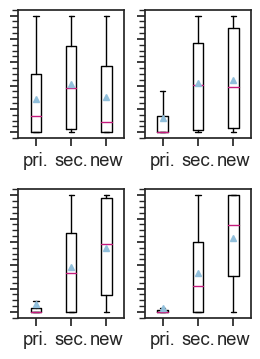

In [49]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3, 4), sharey=True)

labels = ['pri.','sec.','new']
meanpointprops = dict(marker='^', markeredgecolor='#91bfdb',linewidth=0.5,ms=5,
                      markerfacecolor='#91bfdb')
meanlineprops = dict(linestyle='--', linewidth=1.0, color='purple')

medianprops = dict(linestyle='-', linewidth=1.0, color='#c51b7d')

axs[0, 0].boxplot(data_junior, labels=labels,showmeans=True, showfliers=False, 
                  medianprops=medianprops,
                  meanprops=meanpointprops)
# axs[0, 0].set_title('showmeans=True', fontsize=fs)

axs[0, 1].boxplot(data_early, labels=labels, showmeans=True, showfliers=False,medianprops=medianprops,
                  meanprops=meanpointprops)
# axs[0, 1].set_title('showmeans=True', fontsize=fs)

axs[1, 0].boxplot(data_mature, labels=labels, showmeans=True, showfliers=False,medianprops=medianprops,
                  meanprops=meanpointprops)
# axs[1, 0].set_title('showmeans=True', fontsize=fs)

axs[1, 1].boxplot(data_senior, labels=labels, showmeans=True, showfliers=False,medianprops=medianprops,
                  meanprops=meanpointprops)
# axs[1, 1].set_title('showmeans=True', fontsize=fs)



# axs[0, 0].boxplot(data0, labels=labels)
# axs[0, 0].set_title('Default', fontsize=fs)

# axs[0, 1].boxplot(data0, labels=labels, showmeans=True)
# axs[0, 1].set_title('showmeans=True', fontsize=fs)

# axs[0, 2].boxplot(data0, labels=labels, showmeans=True, meanline=True)
# axs[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

# axs[1, 0].boxplot(data0, labels=labels, showbox=False, showcaps=False)
# tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
# axs[1, 0].set_title(tufte_title, fontsize=fs)

# axs[1, 1].boxplot(data0, labels=labels, notch=True, bootstrap=10000)
# axs[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

# axs[1, 2].boxplot(data0, labels=labels, showfliers=False)
# axs[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axs.flat:
    # ax.set_yscale('log')
    ax.set_yticklabels([])
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))

fig.subplots_adjust(hspace=0.4)
plt.show()
fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Chemistry/result_data_plot/new_plot(202403)/boxplot(high-impact surpasser).pdf')

##### Ratio

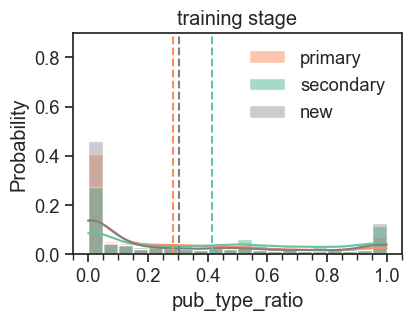

In [50]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.8*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

career_type_df = career_type_df_0

# early stage
X = 'special_main_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', # 'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['main'],label='primary',kde=1,
             ax=ax)


X = 'special_asso_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', 
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['asso'],label='secondary',kde=1,alpha=0.6,
             ax=ax)


X = 'special_new_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', #'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['new'],label='new',kde=1,alpha=0.4,
             ax=ax)

mean_main = np.mean(career_type_df.special_main_ratio)
mean_asso = np.mean(career_type_df.special_asso_ratio)
mean_new = np.mean(career_type_df.special_new_ratio)

ax.axvline(x=mean_main,color=type_colors['main'],ls='--')
ax.axvline(x=mean_asso,color=type_colors['asso'],ls='--')
ax.axvline(x=mean_new,color=type_colors['new'],ls='--')

ax.set(ylim=[0,0.9],
       xlabel='pub_type_ratio',
       title='training stage'
      )

ax.xaxis.set_minor_locator(MultipleLocator(0.05))
x_ticks = np.array([0,2,4,6,8,10])/10
ax.set_xticks(x_ticks, x_ticks)


plt.legend(frameon=0)
# fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Physics/who_is_surpasser/result_data_plot/type_training_stage(high-impact&surpasser).pdf')

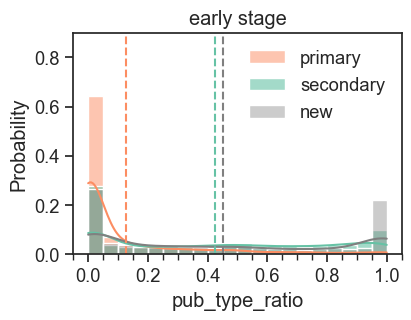

In [51]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.8*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

career_type_df = career_type_df_0

# early stage
X = 'early_main_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', # 'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['main'],label='primary',kde=1,
             ax=ax)
X = 'early_asso_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', 
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['asso'],label='secondary',kde=1,alpha=0.6,
             ax=ax)

X = 'early_new_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', #'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['new'],label='new',kde=1,alpha=0.4,
             ax=ax)

mean_main = np.mean(career_type_df['early_main_ratio'])
mean_asso = np.mean(career_type_df['early_asso_ratio'])
mean_new = np.mean(career_type_df['early_new_ratio'])

ax.axvline(x=mean_main,color=type_colors['main'],ls='--')
ax.axvline(x=mean_asso,color=type_colors['asso'],ls='--')
ax.axvline(x=mean_new,color=type_colors['new'],ls='--')

ax.set(ylim=[0,0.9],
       xlabel='pub_type_ratio',
       title='early stage'
      )

ax.xaxis.set_minor_locator(MultipleLocator(0.05))
x_ticks = np.array([0,2,4,6,8,10])/10
ax.set_xticks(x_ticks, x_ticks)

plt.legend(frameon=0)
# fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Physics/who_is_surpasser/result_data_plot/type_early_stage(high-impact&surpasser).pdf')

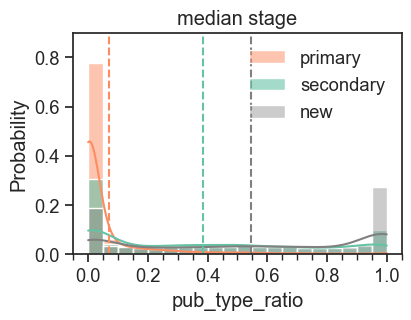

In [52]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.8*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

career_type_df = career_type_df_0[career_type_df_0.median_all>0]

# medain stage
X = 'median_main_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', # 'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['main'],label='primary',kde=1,
             ax=ax)
X = 'median_asso_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', 
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['asso'],label='secondary',kde=1,alpha=0.6,
             ax=ax)

X = 'median_new_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', #'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['new'],label='new',kde=1,alpha=0.4,
             ax=ax)

mean_main = np.mean(career_type_df['median_main_ratio'])
mean_asso = np.mean(career_type_df['median_asso_ratio'])
mean_new = np.mean(career_type_df['median_new_ratio'])

ax.axvline(x=mean_main,color=type_colors['main'],ls='--')
ax.axvline(x=mean_asso,color=type_colors['asso'],ls='--')
ax.axvline(x=mean_new,color=type_colors['new'],ls='--')

ax.set(ylim=[0,0.9],
       xlabel='pub_type_ratio',
       title='median stage'
      )

ax.xaxis.set_minor_locator(MultipleLocator(0.05))
x_ticks = np.array([0,2,4,6,8,10])/10
ax.set_xticks(x_ticks, x_ticks)

plt.legend(frameon=0)
# fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Physics/who_is_surpasser/result_data_plot/type_median_stage(high-impact&surpasser).pdf')

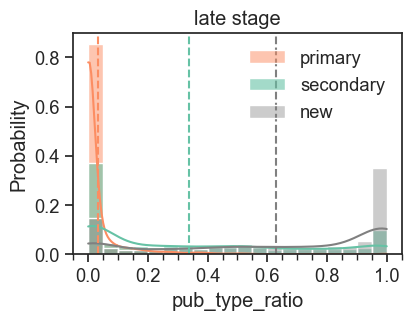

In [53]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.8*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

career_type_df = career_type_df_0[career_type_df_0.late_all>0]

# late stage
X = 'late_main_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', # 'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['main'],label='primary',kde=1,
             ax=ax)
X = 'late_asso_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', 
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['asso'],label='secondary',kde=1,alpha=0.6,
             ax=ax)

X = 'late_new_ratio'
sns.histplot(data=career_type_df, x=X,stat='probability', #'count' 'probability'
             binrange=[0,1],bins=20,element='bars',fill=1,color=type_colors['new'],label='new',kde=1,alpha=0.4,
             ax=ax)

mean_main = np.mean(career_type_df['late_main_ratio'])
mean_asso = np.mean(career_type_df['late_asso_ratio'])
mean_new = np.mean(career_type_df['late_new_ratio'])

ax.axvline(x=mean_main,color=type_colors['main'],ls='--')
ax.axvline(x=mean_asso,color=type_colors['asso'],ls='--')
ax.axvline(x=mean_new,color=type_colors['new'],ls='--')

ax.set(ylim=[0,0.9],
       xlabel='pub_type_ratio',
       title='late stage'
      )

ax.xaxis.set_minor_locator(MultipleLocator(0.05))
x_ticks = np.array([0,2,4,6,8,10])/10
ax.set_xticks(x_ticks, x_ticks)

plt.legend(frameon=0)
# fig.savefig('/Users/yanmemgxing/Nutstore Files/Nutstore/Physics/who_is_surpasser/result_data_plot/type_late_stage(high-impact&surpasser).pdf')